In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import scipy as scp

In [2]:
data=pd.read_excel("D:\Datasets\Real estate valuation dataset\Real estate valuation data set.xlsx")

In [3]:
print(data.head(5))

   No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

In [4]:
#renaming columns
data=data.rename(columns={'No':'No','X1 transaction date':'Date', 'X2 house age':'Age',
       'X3 distance to the nearest MRT station':'Nearest_station',
       'X4 number of convenience stores':'Nearest_store', 'X5 latitude':'Lat', 'X6 longitude':'Long',
       'Y house price of unit area':'Price'})

In [5]:
#taking the columns in separate lists
ages=data['Age']
stations=data['Nearest_station']
stores=data['Nearest_store']
dates=data['Date']
prices=data['Price']
lats=data['Lat']
longs=data['Long']

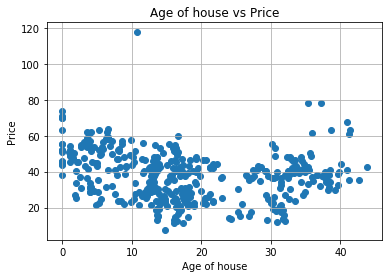

In [6]:
#plotting age of house and price of house for finding correlation
plt.scatter(ages,prices)
plt.title("Age of house vs Price")
plt.xlabel("Age of house")
plt.ylabel("Price")
plt.grid(True)

Price of house seems decreaseing with age of house from age 0 to 30 approximately and then increases. So nothing can be concluded about correlation between the two.

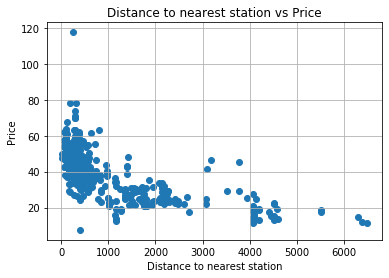

In [7]:
#plotting distance to nearest railway station and price of house for finding correlation
plt.scatter(stations,prices)
plt.title("Distance to nearest station vs Price")
plt.xlabel("Distance to nearest station")
plt.ylabel("Price")
plt.grid(True)

As distance to nearest railway station is increasing, price of house seems decreasing.

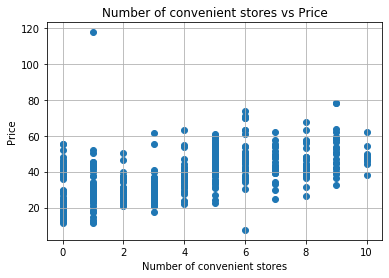

In [8]:
#plotting number of stores nearby and price of house for finding correlation
plt.scatter(stores,prices)
plt.title("Number of convenient stores vs Price")
plt.xlabel("Number of convenient stores")
plt.ylabel("Price")
plt.grid(True)

As number of nearby convenient stores is increasing, price of house seems increasing slightly.

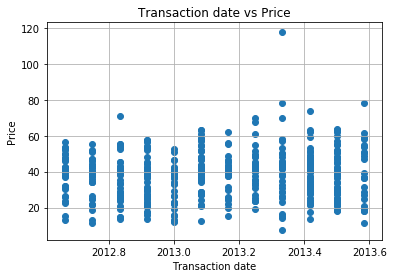

In [9]:
#plotting date of transaction and price of house for finding correlation
plt.scatter(dates,prices)
plt.title("Transaction date vs Price")
plt.xlabel("Transaction date")
plt.ylabel("Price")
plt.grid(True)

As transaction date of the house is increasing, price of house seems decreasing at first till 2013.0, then increasing till after 2013.2, then again and so on.

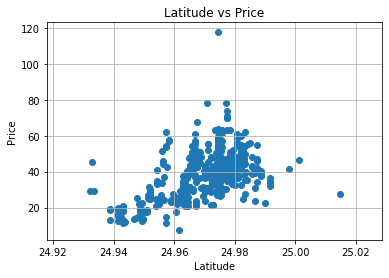

In [10]:
#plotting latitude of the house and price of house for finding correlation
plt.scatter(lats,prices)
plt.title("Latitude vs Price")
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.grid(True)

Price of house seems increasing with increasing latitude

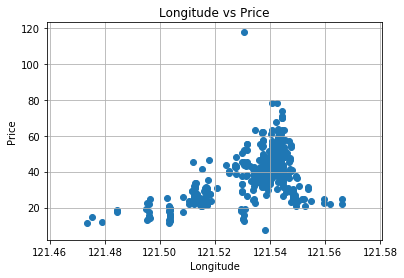

In [11]:
#plotting longitude of house and price of house for finding correlation
plt.scatter(longs,prices)
plt.title("Longitude vs Price")
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.grid(True)

Price of house seems increasing with increasing longitude

In [12]:
#taking a proportion of test dataset and splitting the dataset into training and testing dataset accordingly
test_proportion=float(input("Enter proportion for test data size: "))
test_size=int(len(data)*test_proportion)
test_data=data.sample(test_size)
train_data=[]
for ind in data.index:
    if ind not in test_data.index:
        train_data.append(data.iloc[ind])
train_data=pd.DataFrame(train_data)

Enter proportion for test data size: 0.25


In [13]:
X=train_data[['Date','Age','Nearest_station','Nearest_store','Lat','Long']]

In [14]:
Y=train_data['Price']

In [15]:
#correlation matrix
corr_mat=train_data.corr()
print(corr_mat)

                       No      Date       Age  Nearest_station  Nearest_store  \
No               1.000000 -0.077519 -0.000272        -0.030634      -0.010175   
Date            -0.077519  1.000000  0.048949         0.032139       0.028700   
Age             -0.000272  0.048949  1.000000         0.017507       0.043085   
Nearest_station -0.030634  0.032139  0.017507         1.000000      -0.596869   
Nearest_store   -0.010175  0.028700  0.043085        -0.596869       1.000000   
Lat              0.025116  0.055690  0.051921        -0.575608       0.442743   
Long             0.016995 -0.012609 -0.034378        -0.796965       0.441595   
Price           -0.031391  0.104582 -0.217204        -0.668506       0.568296   

                      Lat      Long     Price  
No               0.025116  0.016995 -0.031391  
Date             0.055690 -0.012609  0.104582  
Age              0.051921 -0.034378 -0.217204  
Nearest_station -0.575608 -0.796965 -0.668506  
Nearest_store    0.442743  0.4

In [16]:
#an empty dictionary which will have column names as the keys and boolean value indicating whether that column has significant correlation with the price column at 1% level of significance as values
corr_sig={}

Those columns which do not have significant correlation with price of house at 1% level of significance will be omitted.
p-value>0.01 implies the correlation coeffiecient is not significant at 1% level of significance and vice versa

In [17]:
#checking correlation between date of transaction of the house and price of house
corr,p=scp.stats.pearsonr(train_data['Date'],train_data['Price'])
print("correlation=%f\tp-value=%f"%(corr,p))
if p>0.01:
    print("Correlation coefficient between Transaction Date and Price of house is not Significant at 1% level of significance")
    corr_sig['Date']=False
else:
    print("Correlation coefficient between Transaction Date and Price of house is Significant at 1% level of significance")
    corr_sig['Date']=True

correlation=0.104582	p-value=0.065482
Correlation coefficient between Transaction Date and Price of house is not Significant at 1% level of significance


In [18]:
#checking correlation between age of house and price of of house
corr,p=scp.stats.pearsonr(train_data['Age'],train_data['Price'])
print("correlation=%f\tp-value=%f"%(corr,p))
if p>0.01:
    print("Correlation coefficient between Age of house and Price of house is not Singnificant at 1% level of significance")
    corr_sig['Age']=False
else:
    print("Correlation coefficient between Age of house and Price of house is Significant at 1% level of significance")
    corr_sig['Age']=True

correlation=-0.217204	p-value=0.000113
Correlation coefficient between Age of house and Price of house is Significant at 1% level of significance


In [19]:
#checking correlation between distance to nearest railway station and price of house
corr,p=scp.stats.pearsonr(train_data['Nearest_station'],train_data['Price'])
print("correlation=%f\tp-value=%f"%(corr,p))
if p>0.01:
    print("Correlation coefficient between Distance to nearest railway station and Price of house is not Singnificant at 1% level of significance")
    corr_sig['Nearest_station']=False
else:
    print("Correlation coefficient between Distance to nearest railway station and Price of house is Significant at 1% level of significance")
    corr_sig['Nearest_station']=True

correlation=-0.668506	p-value=0.000000
Correlation coefficient between Distance to nearest railway station and Price of house is Significant at 1% level of significance


In [20]:
#checking correlation between number of nearest stores nearby and price of house
corr,p=scp.stats.pearsonr(train_data['Nearest_store'],train_data['Price'])
print("correlation=%f\tp-value=%f"%(corr,p))
if p>0.01:
    print("Correlation coefficient between Number of convenient stores nearby and Price of house is not Singnificant at 1% level of significance")
    corr_sig['Nearest_store']=False
else:
    print("Correlation coefficient between Number of convenient stores nearby and Price of house is Significant at 1% level of significance")
    corr_sig['Nearest_store']=True

correlation=0.568296	p-value=0.000000
Correlation coefficient between Number of convenient stores nearby and Price of house is Significant at 1% level of significance


In [21]:
#checking correlation between latitude of house and price of house
corr,p=scp.stats.pearsonr(train_data['Lat'],train_data['Price'])
print("correlation=%f\tp-value=%f"%(corr,p))
if p>0.01:
    print("Correlation coefficient between Latitude and Price of house is not Singnificant at 1% level of significance")
    corr_sig['Lat']=False
else:
    print("Correlation coefficient between Latitude and Price of house is Significant at 1% level of significance")
    corr_sig['Lat']=True

correlation=0.546564	p-value=0.000000
Correlation coefficient between Latitude and Price of house is Significant at 1% level of significance


In [22]:
#checking correlation between longitude of house and price of house
corr,p=scp.stats.pearsonr(train_data['Long'],train_data['Price'])
print("correlation=%f\tp-value=%f"%(corr,p))
if p>0.01:
    print("Correlation coefficient between Longitude and Price of house is not Singnificant at 1% level of significance")
    corr_sig['Long']=False
else:
    print("Correlation coefficient between Longitude and Price of house is Significant at 1% level of significance")
    corr_sig['Long']=True

correlation=0.504052	p-value=0.000000
Correlation coefficient between Longitude and Price of house is Significant at 1% level of significance


In [23]:
print(corr_sig)

{'Date': False, 'Age': True, 'Nearest_station': True, 'Nearest_store': True, 'Lat': True, 'Long': True}


In [24]:
print(train_data["Date"].min())
print(train_data["Date"].max())

2012.6666667
2013.5833333


Only date of transaction is insignificant with respect to price of house. This may happen because the dataset contains transactions between two years only, 2012 and 2013. 

In [25]:
#extracting those columns which have significant impact on price
list_of_significant_columns=[]
for col_name in corr_sig.keys():
    if corr_sig[col_name]==True:
        list_of_significant_columns.append(col_name)
print(list_of_significant_columns)

['Age', 'Nearest_station', 'Nearest_store', 'Lat', 'Long']


In [26]:
#new dataframe with the extracted columns
X=train_data[list_of_significant_columns]

In [27]:
#applying multiple linear regression
regr=linear_model.LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
print("Intercept: ",regr.intercept_)
print("\nCoefficients: ",regr.coef_)

Intercept:  -3775.3332991043203

Coefficients:  [-2.73679457e-01 -4.66489766e-03  1.16693434e+00  2.51947140e+02
 -2.03410192e+01]


In [29]:
#printing summary of the fit
regr_model=sm.OLS(Y,X).fit()
print(regr_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                              1185.
Date:                Tue, 10 Nov 2020   Prob (F-statistic):                   7.78e-198
Time:                        22:00:30   Log-Likelihood:                         -1125.5
No. Observations:                 311   AIC:                                      2261.
Df Residuals:                     306   BIC:                                      2280.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

The column "P>|t|" tells whether the corresponding regression coefficient is significant or not. The p-values for the coefficients are 0, ie less than 0.01. So they are significant at 1% level of significance. So we shall take all these columns in our model.

In [30]:
#test data with the extracted columns
test_X=test_data[list_of_significant_columns]
test_Y=test_data['Price']
#prediction on the test data by the regression model and adding the predicted price as a new column
test_X['Predicted Price']=regr.predict(test_X)
#adding the actual price as a new column
test_X['Actual Price']=test_Y

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [31]:
test_X2=test_X.sort_index()

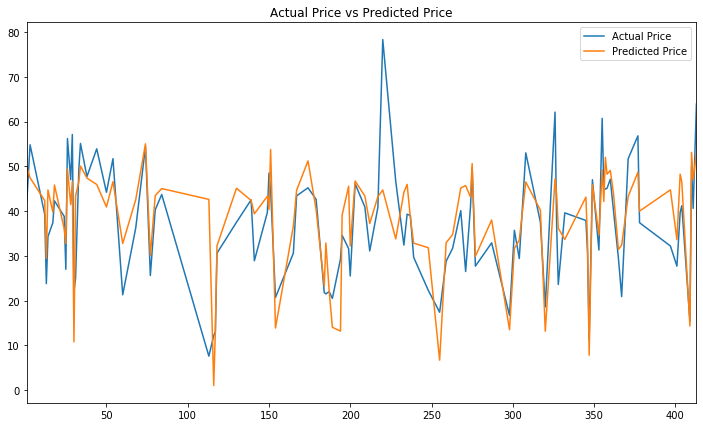

In [32]:
#plotting actual price and predicted price
test_X2.plot(y=['Actual Price','Predicted Price'],title='Actual Price vs Predicted Price',figsize=(12,7))

The predicted price agrees with the actual price as can be seen from the image. So the model fits well with the dataset.